# Homework 6b: The Forward-Time Centered-Space
### (Whatever the heck that means. Could be a sequel to *Crouching Tiger*.)
Physics 177, Spring 2018  
**Due:** Tuesday, May 15

*James Griffith*

**This week:** just one problem. It shouldn't end up being more than 100 lines of code, but we're putting together a lot of different ideas. Use the gitter to bounce ideas off of each other. This one is tricky!

## Discussion

Over the past few weeks, we've played with integrating ordinary differential equations with initial data and partial differential equations with boundary conditions. This problem combines the two techniques into the *forward-time centered-space* method for solving a partial differential equation with initial and boundary data.

This sort of thing shows up when we have an equation with partial derivatives space *and* time. In my opinion, *most* of the insightful equations in physics are of this form: they tell you how each piece of your system evolves ($\partial/\partial t$) as a function of the neighboring pieces of the system ($\partial/\partial x$).

A good example of this is the **diffusion equation**,
$$
\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2} \ .
$$

In this problem (based on Newman Ex. 9.3) we consider the scenario of a steel container (1 cm thick) that is initially 20$^\circ$ C. At $t=0$ it is then placed in a bath of cold water (0$^\circ$ C) and simultaneously filled with hot water (50$^\circ$ C). Assuming that the container is sufficiently wide that we can ignore edge effects, what is the temperature  $T(x,t)$ across the 1 cm of steel as a function of distance $x$ from the cold side and of time $t$?


<img src="HW6b_Newman9.3.png">


## Computational strategy

Let $a$ be the grid spacing. Recalling the form of the second partial derivative, we can write the diffiusion equation for $T(x,t)$---a *partial* differential equation---as a system of *ordinary* differential equations in time for each grid point $x_i$:

$$
\frac{dT(x_i, t)}{dt}
= 
\frac{D}{a^2}
\left[
T(x_i+a, t)
- 2 T(x_i,t)
+ T(x_i-a,t)
\right] \ .
$$

We can then solve this using **Euler's method**. Note that there is no symmetry requiring you to use the same grid spacing in space as you do for time. (This is not the case for relativistic problems where space and time are the same thing.)

## Problem 1. Feeling the Heat

Solve the diffusion equation for the "steel pot in cold water with hot water inside" problem using the forward-time centered-space method. 

### The numbers
Here are the constants and boundary/initial conditions you'll need:

**Boundary conditions**: the hot side is 50$^\circ$ C, the cold side is 0$^\circ$ C.

**Initial conditions**: the rest of the steel starts at 20$^\circ$ C at $t=0$. 

**Constant**: the *thermal diffusivity*, $D$, is 4.25 $\times$ 10$^{{-6}}$m$^2$s$^{-1}$

The thickness of the steel is 1 cm. 

Use `Nt = 1e5` (100,000) samples in time and `N = 100` grid samples in space. Thus your grid spacing, `a`, 0.01 m/100 and your time step, `dt`, is 10 sec / 100,000. 


### Output

Your goals: plot the temperature profile $T(x,t)$ across the steel for specific times: 0.01 sec, 0.1 sec, 0.4 sec, 1 sec, and 10 sec.

### Implementation

You can do this problem however you like, but I suggest that you use `numpy` and review how [slicing](https://stackoverflow.com/questions/4455076/) works. I solved it by creating a two-dimensional array (matrix) $T(x,t)$ that contains the temperatures for each position $x$ and time $t$. Then I used slices (e.g. `T[:,0]`) to assign initial and boundary conditions. 

I had a 'bucket' one-dimensional array `S` that I used to store the $T(x_i,t_{j+1})$ data as a function of the $T(x_i, t_j)$ data, then had an update step that looked like `T[:,ti] = S`.

In [100]:
import numpy as np

# Constants
L = .01   # FILL THIS IN, thickness of the steel in m
D = 4.25e-6  # Thermal diffusivity
N = 100      # Number of grid points
a = L/N      # Grid spacing


Tcold = 0.0
Tinit = 20.0
Thot  = 50.0 # BEGONE

t0 = 0
tf = 10
Nt = 100000
dt = (tf-t0)/Nt
 
temp = np.zeros((N, Nt))


def f(T):
    return (D/(a**2))*(T)






for t in range(0, Nt):
    if(t==0):
        S = [20]*N
        temp[:,t] = S
    else:
        for x in range(0, N):
            if(x == 0):
                temp[x,t] = S[x] + dt*(f(Tcold) - 2*f(temp[x][t-1]) + f(temp[x+1][t-1]))
            elif(x == N-1):
                temp[x,t] = S[x] + dt*(f(temp[x-1][t-1]) - 2*f(temp[x][t-1]) + f(Thot))
            else:
                temp[x,t] = S[x] + dt*(f(temp[x-1][t-1]) - 2*f(temp[x][t-1]) + f(temp[x+1][t-1])) 
    S = temp[:, t]
    
        

print(temp)


# You might want to start with smaller N and Nt
# when you're setting everything up the first time.
# (it's like cooking, you should always taste/test as you go)

# FILL IN THE REST

[[20.         19.15       18.37225    ...  0.49180637  0.4918065
   0.49180663]
 [20.         20.         19.963875   ...  0.98361587  0.98361614
   0.9836164 ]
 [20.         20.         20.         ...  1.47543165  1.47543205
   1.47543245]
 ...
 [20.         20.         20.         ... 48.50513419 48.50513459
  48.50513499]
 [20.         20.         20.0541875  ... 49.00341757 49.00341783
  49.0034181 ]
 [20.         21.275      22.441625   ... 49.50170721 49.50170735
  49.50170748]]


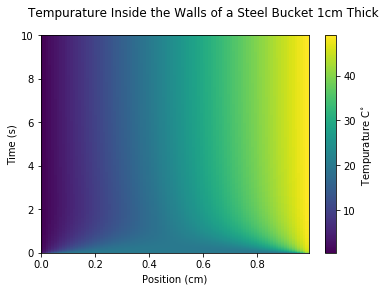

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt



xx, yy = np.meshgrid(np.arange(N),np.arange(Nt))
plt.pcolormesh(xx/100,yy/10000,temp[xx,yy])
plt.colorbar().set_label("Tempurature C$^{\circ}$ ")
plt.xlabel('Position (cm)')
plt.ylabel('Time (s)')
plt.suptitle("Tempurature Inside the Walls of a Steel Bucket 1cm Thick", fontsize=12)
plt.show()

# FILL THIS IN

plt.show()

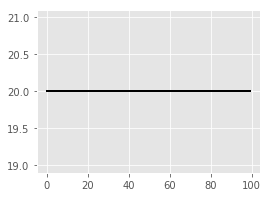

In [141]:
# Example animations using matplotlib's FuncAnimation
# Ken Hughes. 18 June 2016.

# For more detail, see
# https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

# Examples include
#    - line plot
#    - pcolor plot
#    - scatter plot
#    - contour plot
#    - quiver plot
#    - plot with changing labels

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Use matplotlib ggplot stylesheet if available
try:
    plt.style.use('ggplot')
except:
    pass

# Set which type of animation will be plotted. One of:
# line, pcolor, scatter, contour, quiver, labels
animation_type = 'line'



# Create a two-dimensional array of data: F(x, t)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4, 3))

if animation_type not in ['line', 'scatter']:
    ax.set_aspect('equal')


if animation_type == 'line':
    #ax.set(xlim=(-3, 3), ylim=(-1, 1))

    line = ax.plot(x, temp[:,0], color='k', lw=2)[0]

    def animate(i):
        line.set_ydata(temp[:,i])

        

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)

# anim.save(animation_type + '.gif', writer='imagemagick')



## Extra Credit

* Why did we use Euler's method? Runge-Kutta would have been almost as simple to code, but there's a reason why a more sophisticated algorithm like RK2 wouldn't make sense. 

* Runge Kutta would be too

* In a separate cell, produce a "publication-worthy" plot. The axes should be labeled (with units) and have the correct range of values, there should be a title and a legend.

* In a separate cell, *animate* the plot. Plot a single temperature profile as a function of $x$ that evolves in time.